# 1회차 실습 과제: 통계적 사고와 기술통계

## 문제 항목

| 문제 | 주제 | 사용 데이터 |
|------|------|-----------|
| 문제 1 | 중심 경향 측도 (평균, 중앙값, 최빈값, 절사평균, 가중평균) | EMISSIONS |
| 문제 2 | 산포도 측도 (분산, 표준편차, 범위, IQR, 변동계수, 이상치 탐지) | COMB (L/100 km), ENGINE SIZE |
| 문제 3 | 분포의 형태 (왜도, 첨도) | 수치형 변수 전체 |
| 도전 과제 | 라이브러리 없이 기술통계 직접 구현 | 순수 Python |

---

## 데이터 설명

**파일명**: `차량_연비_데이터(2000-2022).csv`

2000~2022년 차량 연비 데이터

| 컬럼 | 설명 |
|------|------|
| YEAR | 차량 제조 연도 |
| MAKE | 제조사 (예: 현대, BMW) |
| MODEL | 차량 모델명 (예: Sonata, Model S) |
| VEHICLE CLASS | 차량 분류 (예: SUV, 세단). 4WD/4X4: 사륜구동, AWD: 전륜구동, FFV: 유연연료 차량 |
| ENGINE SIZE | 엔진 배기량 (단위: 리터) |
| CYLINDERS | 실린더 개수. 출력과 연비에 영향 |
| TRANSMISSION | 변속기 종류. A: 자동, M: 수동, AS: 자동 선택변속기, AV: 무단변속기. 숫자는 기어 수(3~10단) |
| FUEL | 연료 종류. X: 일반 가솔린, Z: 고급 가솔린, D: 디젤, E: 에탄올(E85), N: 천연가스 |
| CITY (L/100 km) | 도심 연비 (연료 소비량) |
| HWY (L/100 km) | 고속도로 연비 (연료 소비량) |
| COMB (L/100 km) | 복합 연비. 도심(55%) + 고속도로(45%) 종합 |
| COMB (mpg) | 복합 연비 (단위: MPG) |
| EMISSIONS | CO2 배출량 (단위: g/km) |

---

In [1]:
# 필수 라이브러리 Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import platform
import os

warnings.filterwarnings('ignore')

# 운영체제별 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False
np.random.seed(42)

print("="*60)
print("1회차 실습 과제: 통계적 사고와 기술통계")
print("="*60)


1회차 실습 과제: 통계적 사고와 기술통계


In [2]:
# 데이터 로드
DATA_PATH = os.path.join('data', '차량_연비_데이터(20022022).csv')
df = pd.read_csv(DATA_PATH)

# 데이터 기본 검증
df.info()
df.head()

<class 'pandas.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YEAR             22556 non-null  int64  
 1   MAKE             22556 non-null  str    
 2   MODEL            22556 non-null  str    
 3   VEHICLE CLASS    22556 non-null  str    
 4   ENGINE SIZE      22556 non-null  float64
 5   CYLINDERS        22556 non-null  int64  
 6   TRANSMISSION     22556 non-null  str    
 7   FUEL             22556 non-null  str    
 8   CITY (L/100 km)  22556 non-null  float64
 9   HWY (L/100 km)   22556 non-null  float64
 10  COMB (L/100 km)  22556 non-null  float64
 11  COMB (mpg)       22556 non-null  int64  
 12  EMISSIONS        22556 non-null  int64  
dtypes: float64(4), int64(4), str(5)
memory usage: 2.2 MB


,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [3]:
# 데이터 전처리
df['VEHICLE CLASS'] = (df['VEHICLE CLASS']
                       .str.upper()
                       .str.replace(':', ' -')
                       .str.replace('  ', ' ')
                       .str.strip())

# 범주 값별 빈도 확인
df['VEHICLE CLASS'].value_counts()

VEHICLE CLASS
COMPACT                     3127
MID-SIZE                    2960
SUV                         2640
PICKUP TRUCK - STANDARD     2204
SUBCOMPACT                  2010
SUV - SMALL                 1756
FULL-SIZE                   1503
TWO-SEATER                  1312
SUV - STANDARD              1122
MINICOMPACT                  994
STATION WAGON - SMALL        877
PICKUP TRUCK - SMALL         511
MINIVAN                      408
STATION WAGON - MID-SIZE     387
VAN - CARGO                  332
VAN - PASSENGER              299
SPECIAL PURPOSE VEHICLE      114
Name: count, dtype: int64

---

## 📝 실습 문제 1: 중심 경향 측도

### 배경
차량의 **EMISSIONS(CO2 배출량)** 데이터로 다양한 대표값을 계산하고 비교합니다.

### 이론 복습

| 대표값 | 특징 | 이상치 민감도 |
|--------|------|:-------------:|
| 산술평균 | 모든 값 반영 | 매우 민감 |
| 중앙값 | 정렬 후 가운데 값 | 강건함 |
| 최빈값 | 가장 빈번한 값 | - |
| 절사평균 | 양끝 제거 후 평균 | 중간 |
| 가중평균 | 가중치 반영 평균 | 매우 민감 |

### 수행할 작업
1. EMISSIONS의 산술평균, 중앙값, 최빈값 계산
2. 10%, 20% 절사평균 계산 및 산술평균과 비교
3. 차량등급(COMPACT, MID-SIZE, SUV)인 차량에 대한 가중평균 계산 (COMPACT 50%, MID-SIZE 30%, SUV 20%)
4. 차량등급(COMPACT, MID-SIZE, SUV)별 평균/중앙값 비교
5. 결과 해석: 어떤 상황에서 어떤 대표값이 적절한지 정리

In [4]:
df_e = df['EMISSIONS']

# TODO 1: 기본 대표값 계산 (산술평균, 중앙값, 최빈값)
df_mean = df_e.mean()
df_median = df_e.median()
df_mode = df_e.mode()
print(f'산술평균: {df_mean:.2f}')
print(f'중앙값: {df_median:.2f}')
print(f'최빈값: {df_mode}')

# TODO 2: 절사평균 계산
print(f'절사평균(10%): {stats.trim_mean(df_e,0.1):.2f}')
print(f'절사평균(20%): {stats.trim_mean(df_e,0.2):.2f}')

# TODO 3: 차량등급(COMPACT, MID-SIZE, SUV)인 차량에 대한 가중평균 계산 (COMPACT 50%, MID-SIZE 30%, SUV 20%)
values = {'COMPACT':50,'MID-SIZE':30,'SUV':20
}
df_class_mean = df.groupby('VEHICLE CLASS')['EMISSIONS'].mean()
df_todo = df_class_mean.loc[values.keys()]
print(df_todo)
w = df_todo.index.map(values)
print(f'가중평균: {np.average(df_todo, weights=w):.2f}')

# TODO 4: 차량등급(COMPACT, MID-SIZE, SUV)별 평균/중앙값 비교
df_class_median = df.groupby('VEHICLE CLASS')['EMISSIONS'].median()
df_todo_mean = df_class_mean.loc[values.keys()]
df_todo_median = df_class_median.loc[values.keys()]
print(f'COMPACT 평균:{df_todo_mean['COMPACT']:.2f} ')
print(f'COMPACT 중앙값:{df_todo_median['COMPACT']:.2f} ')
print(f'MID-SIZE 평균:{df_todo_mean['MID-SIZE']:.2f} ')
print(f'MID-SIZE 중앙값:{df_todo_median['MID-SIZE']:.2f} ')
print(f'SUV 평균:{df_todo_mean['SUV']:.2f} ')
print(f'SUV 중앙값:{df_todo_median['SUV']:.2f} ')
# TODO 5: 결과 해석 (print문으로 작성)
print(f'세 차량등급 모두 CO2 배출량 평균이 중앙값보다 높은 양의 왜도인 분포 형태를 띄고 있다. 대부분이 중앙값과 비슷하지만, 소수의 일부 모델이 배출량이 많은 듯 하다.')

산술평균: 250.07
중앙값: 243.00
최빈값: 0    221
Name: EMISSIONS, dtype: int64
절사평균(10%): 247.34
절사평균(20%): 245.40
VEHICLE CLASS
COMPACT     211.539175
MID-SIZE    223.700676
SUV         270.303030
Name: EMISSIONS, dtype: float64
가중평균: 226.94
COMPACT 평균:211.54 
COMPACT 중앙값:207.00 
MID-SIZE 평균:223.70 
MID-SIZE 중앙값:221.00 
SUV 평균:270.30 
SUV 중앙값:267.00 
세 차량등급 모두 CO2 배출량 평균이 중앙값보다 높은 양의 왜도인 분포 형태를 띄고 있다. 대부분이 중앙값과 비슷하지만, 소수의 일부 모델이 배출량이 많은 듯 하다.


---

## 📝 실습 문제 2: 산포도 측도

### 배경
**COMB (L/100 km)** 와 **ENGINE SIZE**의 산포를 분석합니다.

### 이론 복습

| 지표 | 계산 방식 | 이상치 민감도 |
|------|----------|:------------:|
| 분산/표준편차 | 평균 기준 편차 제곱 | 민감 |
| 범위 | 최대 - 최소 | 매우 민감 |
| IQR | Q3 - Q1 | 강건 |

### 이상치 탐지 방법
- **IQR 방법**: Q1 - 1.5×IQR 미만 또는 Q3 + 1.5×IQR 초과
- **Z-score 방법**: |Z| > 2 또는 3

### 수행할 작업
1. 두 변수의 분산, 표준편차, 범위, IQR 계산
2. 변동계수(CV) 계산하여 상대적 산포 비교
3. IQR 방법과 Z-score 방법으로 이상치 탐지 및 비교
4. 2×2 시각화: 각 변수의 히스토그램 + 차량등급별 박스플롯
5. 차량등급별(COMPACT, MID-SIZE, SUV) 두 변수의 표준편차 비교
6. 결과 해석

COMB 분산: 8.47
SIZE 분산: 1.78
COMB 표준편차: 2.91
SIZE 표준편차: 1.34
comb 범위: 22.50
size 범위: 7.60
comb 변동계수 : 26.38
size 변동계수 : 39.78
comb iqr 이상치: 548
size iqr 이상치: 41
COMB Z-score 이상치:
COMB |Z-score| > 2 이상치 개수: 1124
COMB |Z-score| > 3 이상치 개수: 219
SIZE Z-score 이상치:
SIZE |Z-score| > 2 이상치 개수: 762
SIZE |Z-score| > 3 이상치 개수: 41


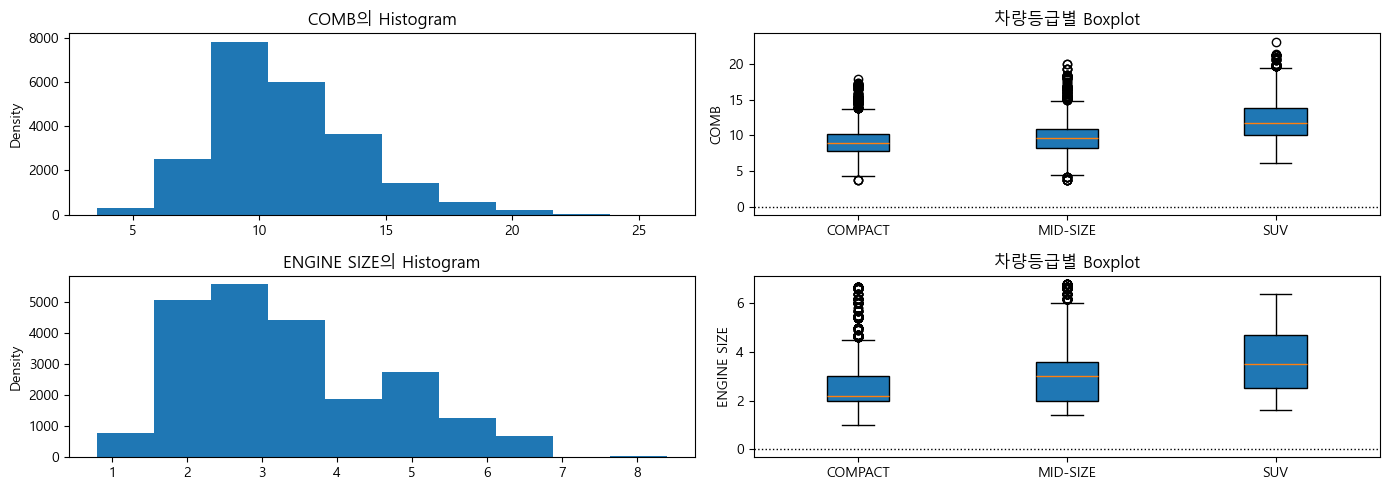

COMB-COMPACT std: 2.06
COMB-MID-SIZE std: 2.40
COMB-SUV std: 2.71
SIZE-COMPACT std: 1.08
SIZE-MID-SIZE std: 1.19
SIZE-SUV std: 1.20
comb가 size에 비해 훨씬 더 퍼져있는 분포로 보이지만, 변동계수를 보면 실제 자료의 변동성은 size의 경우가 더 크다.
iqr 이상치 제거 개수가 차이나는걸 보면, comb가 size에 비해 극단값이 많음을 알 수 있다.


In [5]:
comb = df['COMB (L/100 km)']
size = df['ENGINE SIZE']
# TODO 1: 두 변수의 산포 측도 계산 (분산, 표준편차, 범위, IQR)
comb_var = comb.var()
size_var = size.var()
print(f'COMB 분산: {comb_var:.2f}')
print(f'SIZE 분산: {size_var:.2f}')
comb_std = comb.std()
size_std = size.std()
print(f'COMB 표준편차: {comb_std:.2f}')
print(f'SIZE 표준편차: {size_std:.2f}')
comb_range = max(comb)-min(comb)
size_range = max(size)-min(size)
print(f'comb 범위: {comb_range:.2f}')
print(f'size 범위: {size_range:.2f}')

# TODO 2: 변동계수(CV) 계산
comb_mean = comb.mean()
size_mean = size.mean()

comb_cv = comb_std / comb_mean * 100
size_cv = size_std / size_mean * 100
print(f'comb 변동계수 : {comb_cv:.2f}')
print(f'size 변동계수 : {size_cv:.2f}')

# TODO 3: 이상치 탐지 (IQR, Z-score)
# 3-1 IQR
comb_q1 = comb.quantile(0.25) 
comb_q2 = comb.quantile(0.5) 
comb_q3 = comb.quantile(0.75)
size_q1 = size.quantile(0.25) 
size_q2 = size.quantile(0.5) 
size_q3 = size.quantile(0.75)

comb_iqr = comb_q3 - comb_q1
size_iqr = size_q3 - size_q1

comb_iqr_lower = comb_q1 - 1.5 * comb_iqr
comb_iqr_upper = comb_q3 + 1.5 * comb_iqr

size_iqr_lower = size_q1 - 1.5 * size_iqr
size_iqr_upper = size_q3 + 1.5 * size_iqr

comb_iqr_outliers = comb[(comb < comb_iqr_lower) | (comb > comb_iqr_upper)]
size_iqr_outliers = size[(size < size_iqr_lower) | (size > size_iqr_upper)]

print(f'comb iqr 이상치: {len(comb_iqr_outliers)}')
print(f'size iqr 이상치: {len(size_iqr_outliers)}')

#3-2 z-score

comb_z_scores = (comb - comb.mean()) / comb.std()
comb_z_outliers_2 = comb[np.abs(comb_z_scores) > 2]
comb_z_outliers_3 = comb[np.abs(comb_z_scores) > 3]

size_z_scores = (size - size.mean()) / size.std()
size_z_outliers_2 = size[np.abs(size_z_scores) > 2]
size_z_outliers_3 = size[np.abs(size_z_scores) > 3]

print('COMB Z-score 이상치:')
print('COMB |Z-score| > 2 이상치 개수:', len(comb_z_outliers_2))
print('COMB |Z-score| > 3 이상치 개수:', len(comb_z_outliers_3))

print('SIZE Z-score 이상치:')
print('SIZE |Z-score| > 2 이상치 개수:', len(size_z_outliers_2))
print('SIZE |Z-score| > 3 이상치 개수:', len(size_z_outliers_3))

# TODO 4: 2×2 시각화: 각 변수의 히스토그램 + 차량등급별 박스플롯(차량등급은 COMPACT,MID-SIZE,SUV)
compact = df[df['VEHICLE CLASS']=='COMPACT']
mid_size = df[df['VEHICLE CLASS']=='MID-SIZE']
suv = df[df['VEHICLE CLASS']=='SUV']


fig, axes = plt.subplots(2, 2, figsize=(14, 5))
#comb
axes[0,0].hist(comb)
axes[0,0].set_ylabel('Density')
axes[0,0].set_title('COMB의 Histogram')
axes[0,1].boxplot([compact['COMB (L/100 km)'],mid_size['COMB (L/100 km)'],suv['COMB (L/100 km)']], labels = ['COMPACT','MID-SIZE','SUV']
                  ,patch_artist = True)
axes[0,1].axhline(0, color='black', linestyle=':', linewidth=1)
axes[0,1].set_ylabel('COMB')
axes[0,1].set_title('차량등급별 Boxplot')
#size
axes[1,0].hist(size)
axes[1,0].set_ylabel('Density')
axes[1,0].set_title('ENGINE SIZE의 Histogram')
axes[1,1].boxplot([compact['ENGINE SIZE'],mid_size['ENGINE SIZE'],suv['ENGINE SIZE']], labels = ['COMPACT','MID-SIZE','SUV']
                  ,patch_artist = True)
axes[1,1].axhline(0, color='black', linestyle=':', linewidth=1)
axes[1,1].set_ylabel('ENGINE SIZE')
axes[1,1].set_title('차량등급별 Boxplot')
fig.tight_layout()
plt.show()

# TODO 5: 차량등급별(COMPACT, MID-SIZE, SUV) 표준편차 비교
print(f'COMB-COMPACT std: {compact['COMB (L/100 km)'].std():.2f}')
print(f'COMB-MID-SIZE std: {mid_size['COMB (L/100 km)'].std():.2f}')
print(f'COMB-SUV std: {suv['COMB (L/100 km)'].std():.2f}')
print(f'SIZE-COMPACT std: {compact['ENGINE SIZE'].std():.2f}')
print(f'SIZE-MID-SIZE std: {mid_size['ENGINE SIZE'].std():.2f}')
print(f'SIZE-SUV std: {suv['ENGINE SIZE'].std():.2f}')
# TODO 6: 결과 해석
print('comb가 size에 비해 훨씬 더 퍼져있는 분포로 보이지만, 변동계수를 보면 실제 자료의 변동성은 size의 경우가 더 크다.')
print('iqr 이상치 제거 개수가 차이나는걸 보면, comb가 size에 비해 극단값이 많음을 알 수 있다.')

---

## 📝 실습 문제 3: 분포의 형태 (왜도, 첨도)

### 배경
4가지 수치형 변수의 **왜도와 첨도**를 분석하여 분포 형태를 파악합니다.

### 이론 복습

**왜도**
| 왜도 | 의미 | 평균 vs 중앙값 |
|------|------|---------------|
| = 0 | 대칭 | 평균 ≈ 중앙값 |
| > 0 | 오른쪽 꼬리 | 평균 > 중앙값 |
| < 0 | 왼쪽 꼬리 | 평균 < 중앙값 |


**초과 첨도**
| 첨도 | 의미 |
|------|------|
| = 0 | 정규분포와 동일 |
| > 0 | 꼬리 두꺼움 (극단값 많음) |
| < 0 | 꼬리 얇음 (극단값 적음) |

### 수행할 작업
1. 4개 변수의 왜도/첨도 계산: ENGINE SIZE, COMB (L/100 km), COMB (mpg), EMISSIONS
2. 결과를 DataFrame으로 정리 (왜도/첨도 해석 컬럼 포함)
3. 2×2 히스토그램+KDE 시각화 (제목에 왜도/첨도 표시)
    - 각 그래프에 평균(빨강)과 중앙값(초록) 수직선 표시
4. 연료타입(FUEL)별 EMISSIONS 왜도/첨도 비교
5. 결과 해석

ENGINE SIZE        0.631
COMB (L/100 km)    0.817
COMB (mpg)         1.173
EMISSIONS          0.535
dtype: float64 왜도
ENGINE SIZE       -0.395
COMB (L/100 km)    1.055
COMB (mpg)         3.644
EMISSIONS          0.615
dtype: float64 첨도


,col,skew,kurt,skew_info,kurt_info
0,ENGINE SIZE,0.631,-0.395,양의 왜도,음의 첨도
1,COMB (L/100 km),0.817,1.055,양의 왜도,양의 첨도
2,COMB (mpg),1.173,3.644,양의 왜도,양의 첨도
3,EMISSIONS,0.535,0.615,양의 왜도,양의 첨도


,FUEL,왜도,첨도
0,X,0.331,-0.293
1,Z,0.997,1.608
2,E,-0.189,-0.256
3,N,-1.852,3.071
4,D,-0.368,-1.043


연료가 X,Z 인 차량의 CO2 배출량은 오른쪽 꼬리가 긴 분포를 보인다. 이는 중앙값이 평균보다 작은, 절반 이상이 평균보다 아래인 구조이다.
연료가 E,N,D인 차량의 CO2 배출량은 반대로 왼쪽 꼬리가 긴 분포로, 이는 중앙값이 평균보다 작다.
연료가 Z,N인 차량의 CO2 배출량은 양의 첨도로, 비교적 극단적인 수치가 나올 경우가 높다.(일정 수준에서 벗어난 값이 존재한다.)
반대로 연료가 X,E,D인 차량의 CO2 배출량은 음의 첨도로, 극단적인 수치가 나올 경우가 적다.(일전 기준을 벗어난 범위의 수치가 발견될 가능성이 낮다)


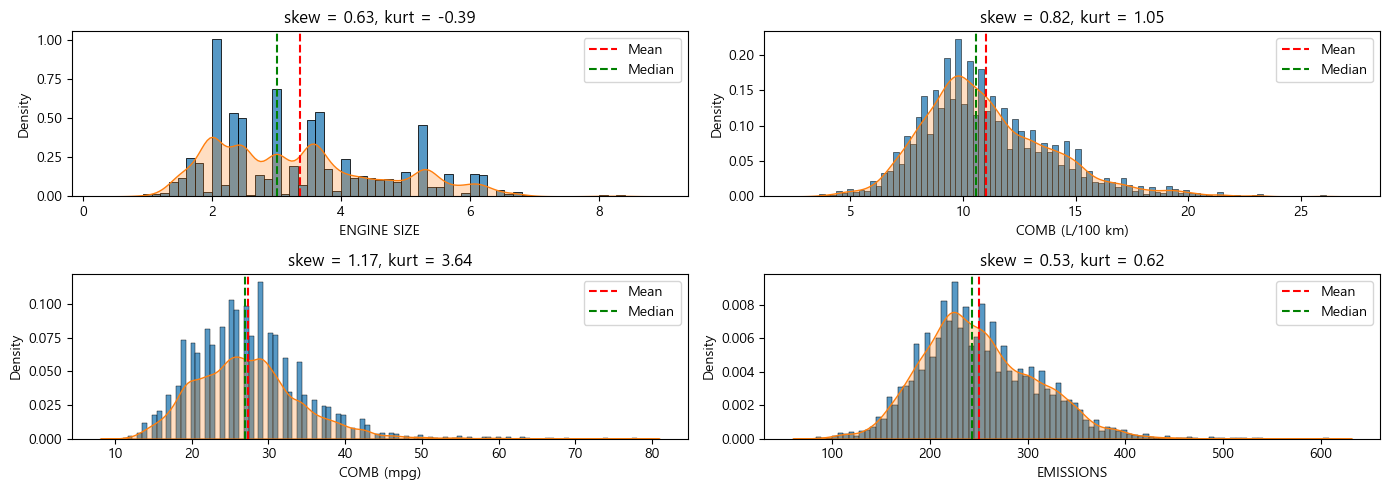

In [6]:
numeric_cols = ['ENGINE SIZE', 'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS']

# TODO 1: 왜도/첨도 계산
print(df[numeric_cols].skew().round(3),'왜도')
print(df[numeric_cols].kurt().round(3),'첨도')
# TODO 2: 결과 DataFrame 정리 (왜도/첨도 해석 컬럼 포함)
results_df = pd.DataFrame({'col' : numeric_cols,
                           'skew' : df[numeric_cols].skew().round(3).values,
                           'kurt' : df[numeric_cols].kurt().round(3).values,
                           'skew_info' :['양의 왜도']*4,
                           'kurt_info' :['음의 첨도','양의 첨도','양의 첨도','양의 첨도']
})
display(results_df)
# TODO 3: 2×2 히스토그램+KDE 시각화 (제목에 왜도/첨도 표시, 평균/중앙값 수직선)
fig , axes = plt.subplots(2,2,figsize=(14,5))

sns.histplot(data=df['ENGINE SIZE'],stat = 'density',ax = axes[0,0])
sns.kdeplot(data=df['ENGINE SIZE'],ax = axes[0,0],fill=True)
axes[0,0].set_title(f"skew = {df['ENGINE SIZE'].skew():.2f}, kurt = {df['ENGINE SIZE'].kurt():.2f}")
mean_00 = df['ENGINE SIZE'].mean()
median_00 = df['ENGINE SIZE'].median()
axes[0,0].axvline(mean_00, color='red', linestyle='--', label='Mean')
axes[0,0].axvline(median_00, color='green', linestyle='--', label='Median')
axes[0,0].legend()

sns.histplot(data=df['COMB (L/100 km)'],stat = 'density',ax = axes[0,1])
sns.kdeplot(data=df['COMB (L/100 km)'],ax = axes[0,1],fill=True)
axes[0,1].set_title(f"skew = {df['COMB (L/100 km)'].skew():.2f}, kurt = {df['COMB (L/100 km)'].kurt():.2f}")
mean_01 = df['COMB (L/100 km)'].mean()
median_01 = df['COMB (L/100 km)'].median()
axes[0,1].axvline(mean_01, color='red', linestyle='--', label='Mean')
axes[0,1].axvline(median_01, color='green', linestyle='--', label='Median')
axes[0,1].legend()

sns.histplot(data=df['COMB (mpg)'],stat = 'density',ax = axes[1,0])
sns.kdeplot(data=df['COMB (mpg)'],ax = axes[1,0],fill=True)
axes[1,0].set_title(f"skew = {df['COMB (mpg)'].skew():.2f}, kurt = {df['COMB (mpg)'].kurt():.2f}")
mean_10 = df['COMB (mpg)'].mean()
median_10 = df['COMB (mpg)'].median()
axes[1,0].axvline(mean_10, color='red', linestyle='--', label='Mean')
axes[1,0].axvline(median_10, color='green', linestyle='--', label='Median')
axes[1,0].legend()

sns.histplot(data=df['EMISSIONS'],stat = 'density',ax = axes[1,1])
sns.kdeplot(data=df['EMISSIONS'],ax = axes[1,1],fill=True)
axes[1,1].set_title(f"skew = {df['EMISSIONS'].skew():.2f}, kurt = {df['EMISSIONS'].kurt():.2f}")
mean_11 = df['EMISSIONS'].mean()
median_11 = df['EMISSIONS'].median()
axes[1,1].axvline(mean_11, color='red', linestyle='--', label='Mean')
axes[1,1].axvline(median_11, color='green', linestyle='--', label='Median')
axes[1,1].legend()


fig.tight_layout()
# TODO 4: 연료타입(FUEL)별 EMISSIONS 왜도/첨도 비교
fuel_values = df['FUEL'].unique()
skew =[]
kurt=[]
for i in fuel_values:
    skew.append(df[df['FUEL']==i]['EMISSIONS'].skew().round(3))
    kurt.append(df[df['FUEL']==i]['EMISSIONS'].kurt().round(3))
skew    
todo4_df = pd.DataFrame({
    'FUEL' : fuel_values, '왜도' : skew, '첨도' : kurt
})
display(todo4_df)

# TODO 5: 결과 해석
print('연료가 X,Z 인 차량의 CO2 배출량은 오른쪽 꼬리가 긴 분포를 보인다. 이는 중앙값이 평균보다 작은, 절반 이상이 평균보다 아래인 구조이다.')
print('연료가 E,N,D인 차량의 CO2 배출량은 반대로 왼쪽 꼬리가 긴 분포로, 이는 중앙값이 평균보다 작다.')
print('연료가 Z,N인 차량의 CO2 배출량은 양의 첨도로, 비교적 극단적인 수치가 나올 경우가 높다.(일정 수준에서 벗어난 값이 존재한다.)')
print('반대로 연료가 X,E,D인 차량의 CO2 배출량은 음의 첨도로, 극단적인 수치가 나올 경우가 적다.(일전 기준을 벗어난 범위의 수치가 발견될 가능성이 낮다)')

In [7]:
df[df['FUEL']=='E']['EMISSIONS'].skew()

np.float64(-0.1893202980471995)

---

## 🏆 도전 과제: 라이브러리 없이 기술통계 직접 구현

numpy, scipy 없이 **순수 Python**으로 기술통계 함수를 구현합니다.

### 규칙
- `math.sqrt`만 사용 가능
- 내장 함수 `sum()`, `len()`, `sorted()`, `min()`, `max()` 사용 가능

### 구현할 함수

| 함수 | 설명 |
|------|------|
| `my_mean(data)` | 산술평균 |
| `my_trimmed_mean(data, proportion)` | 절사평균 (양쪽 proportion 비율 제거) |
| `my_weighted_mean(data, weights)` | 가중평균 |
| `my_median(data)` | 중앙값 |
| `my_mode(data)` | 최빈값 |
| `my_variance(data, ddof=0)` | 분산 (ddof=0: 모분산, ddof=1: 표본분산) |
| `my_std(data, ddof=0)` | 표준편차 |
| `my_percentile(data, q)` | 퍼센타일 (Nearest Rank 방식) |
| `my_iqr(data)` | 사분위범위 (Q3 - Q1) |

In [ ]:
import math


def my_mean(data):
    return sum(data)/len(data)
    """
    산술평균: 합계 / 개수
    
    Parameters
    ----------
    data : list
        숫자 리스트
    
    Returns
    -------
    float
        산술평균 값
    
    Examples
    --------
    >>> my_mean([1, 2, 3, 4, 5])
    3.0
    >>> my_mean([10, 20, 30])
    20.0
    """
    pass


def my_trimmed_mean(data, proportion):
    sorted_data = sorted(data)
    d = int((len(sorted_data)*proportion))
    trimmed_data = sorted_data[d:len(sorted_data)-d]
    return sum(trimmed_data)/len(trimmed_data)
    """
    절사평균: 양쪽 끝에서 일정 비율을 제거한 후 평균
    
    Parameters
    ----------
    data : list
        숫자 리스트
    proportion : float
        제거할 비율 (0 ~ 0.5 미만)
        - 0.1이면 양쪽에서 각각 10%씩 제거 (총 20% 제거)
        - 0.25이면 양쪽에서 각각 25%씩 제거 (총 50% 제거)
    
    Returns
    -------
    float
        절사평균 값
    
    Notes
    -----
    - proportion이 0이면 산술평균과 동일
    - proportion이 0.5에 가까우면 중앙값에 가까워짐
    - 이상치에 민감한 산술평균의 단점을 보완
    
    Examples
    --------
    >>> my_trimmed_mean([1, 2, 3, 4, 100], 0.2)  # 양쪽 1개씩 제거
    3.0  # [2, 3, 4]의 평균
    >>> my_trimmed_mean([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 0.1)  # 양쪽 1개씩 제거
    5.5  # [2, 3, 4, 5, 6, 7, 8, 9]의 평균
    """
    pass


def my_weighted_mean(data, weights):
    n = 0
    s = 0
    for x,y in zip(data,weights):
        s += x*y
        n+=y
    return s/n
    """
    가중평균: 각 값에 가중치를 곱한 후 평균
    
    Parameters
    ----------
    data : list
        숫자 리스트
    weights : list
        가중치 리스트 (data와 길이가 같아야 함)
    
    Returns
    -------
    float
        가중평균 값
    
    Notes
    -----
    - 가중치의 합이 1이 아니어도 됨 (내부에서 정규화)
    - 모든 가중치가 같으면 산술평균과 동일
    
    Examples
    --------
    >>> my_weighted_mean([80, 90, 70], [3, 3, 2])  # 학점 계산
    80.0  # (80*3 + 90*3 + 70*2) / (3+3+2)
    >>> my_weighted_mean([100, 200], [1, 1])  # 동일 가중치
    150.0  # 산술평균과 동일
    """
    pass

#인덱싱엔 정수형만 들어가므로 주의..
def my_median(data):
    sorted_data = sorted(data)
    n= len(sorted_data)
    if n%2==1:
        m = (n-1)//2
        return sorted_data[m]
    else:
        m = n//2
        return (sorted_data[m-1]+sorted_data[m])/2
         
    """
    중앙값: 정렬 후 가운데 값 (짝수면 두 값의 평균)
    
    Parameters
    ----------
    data : list
        숫자 리스트
    
    Returns
    -------
    float
        중앙값
    
    Examples
    --------
    >>> my_median([1, 3, 5])  # 홀수 개
    3.0
    >>> my_median([1, 2, 3, 4])  # 짝수 개
    2.5  # (2 + 3) / 2
    """
    pass

#먼저 나온 순으로 계산하게끔 수정
def my_mode(data):
    mode_cnt = 0
    for i in data:
        cnt = 0
        for x in data:
            if i == x:
                cnt += 1
        if cnt > mode_cnt:
            mode_cnt = cnt
            mode_value = i
    return mode_value
            
  
    """
    최빈값: 가장 빈번한 값
    
    Parameters
    ----------
    data : list
        숫자 리스트
    
    Returns
    -------
    int or float
        가장 빈번하게 등장하는 값 (동률이면 먼저 나온 값)
    
    Examples
    --------
    >>> my_mode([1, 2, 2, 3, 3, 3])
    3
    >>> my_mode([1, 1, 2, 2])  # 동률: 먼저 나온 1 반환
    1
    """
    pass


def my_variance(data, ddof=0):
    m = sum(data)/len(data)
    d = 0
    n = len(data)
    for i in data:
        d += (i-m)**2
    v = d/(n-ddof)
    return v
    """
    분산: 편차 제곱의 평균
    
    Parameters
    ----------
    data : list
        숫자 리스트
    ddof : int, default=0
        자유도 조정값 (Delta Degrees of Freedom)
        - ddof=0: 모분산 (N으로 나눔)
        - ddof=1: 표본분산 (N-1로 나눔, 베셀 보정)
    
    Returns
    -------
    float
        분산 값
    
    Examples
    --------
    >>> my_variance([1, 2, 3, 4, 5], ddof=0)  # 모분산
    2.0
    >>> my_variance([1, 2, 3, 4, 5], ddof=1)  # 표본분산
    2.5
    """
    pass


def my_std(data, ddof=0):
    m = sum(data)/len(data)
    d = 0
    n = len(data)
    for i in data:
        d += (i-m)**2
    v = d/(n-ddof)
    s = v**0.5
    return s
    """
    표준편차: 분산의 제곱근
    
    Parameters
    ----------
    data : list
        숫자 리스트
    ddof : int, default=0
        자유도 조정값 (my_variance와 동일)
    
    Returns
    -------
    float
        표준편차 값
    
    Examples
    --------
    >>> my_std([1, 2, 3, 4, 5], ddof=0)  # 모표준편차
    1.4142...
    >>> my_std([1, 2, 3, 4, 5], ddof=1)  # 표본표준편차
    1.5811...
    """
    pass


def my_percentile(data, q):
    n = len(data)
    sorted_data = sorted(data)
    p = q/100
    p_index = round((n-1)*p)
    return sorted_data[p_index]
    """
    q번째 퍼센타일 (Nearest Rank 방식)
    
    Parameters
    ----------
    data : list
        숫자 리스트
    q : float
        퍼센타일 값 (0 ~ 100)
    
    Returns
    -------
    float
        q번째 퍼센타일 값 (실제 데이터 중 하나)
    
    Notes
    -----
    - Nearest Rank 방식: 계산된 위치에서 가장 가까운 인덱스의 실제 값 반환
    - q=0: 최솟값, q=100: 최댓값, q=50: 중앙값 근사
    
    Examples
    --------
    >>> my_percentile([1, 2, 3, 4, 5], 0)
    1  # 최솟값
    >>> my_percentile([1, 2, 3, 4, 5], 50)
    3  # 중앙 위치 값
    >>> my_percentile([1, 2, 3, 4, 5], 100)
    5  # 최댓값
    >>> my_percentile([10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 25)
    30  # 인덱스 round(9 * 0.25) = 2 → 30
    """
    pass


def my_iqr(data):
    sorted_data = sorted(data)
    n = len(data)
    q1 = sorted_data[round((n-1)*0.25)]
    q3 = sorted_data[round((n-1)*0.75)]
    iqr = q3 - q1
    return iqr
    """
    사분위범위(IQR): Q3 - Q1 (Nearest Rank 방식)
    
    Parameters
    ----------
    data : list
        숫자 리스트
    
    Returns
    -------
    float
        IQR 값 (75번째 퍼센타일 - 25번째 퍼센타일)
    
    Examples
    --------
    >>> my_iqr([1, 2, 3, 4, 5, 6, 7])  # 인덱스: 0~6
    4.0  # Q3(인덱스 5→6) - Q1(인덱스 2→2) = 6 - 2 = 4
    >>> my_iqr([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    5.0  # Q3(8) - Q1(3) = 5
    """
    pass

In [9]:
# 검증 코드
import numpy as np
from scipy import stats

print("\n" + "="*60)
print("검증 결과")
print("="*60)

# 테스트 데이터
test_data = [4, 7, 2, 9, 1, 5, 3, 8, 6, 5]
test_odd = [3, 1, 4, 1, 5]
test_single = [42]
test_same = [7, 7, 7, 7, 7]
test_negative = [-5, -2, 0, 3, 7]
test_outlier = [1, 2, 3, 4, 100]

all_pass = True
total = 0
passed = 0

def check(name, mine, expected, tol=0.001):
    global all_pass, total, passed
    total += 1
    if mine is None:
        print(f"  ❌ {name}: 미구현")
        all_pass = False
    else:
        try:
            match = abs(float(mine) - float(expected)) < tol
            if match:
                passed += 1
                print(f"  ✅ {name}: {float(mine):.4f}")
            else:
                all_pass = False
                print(f"  ❌ {name}: {float(mine):.4f} (정답: {float(expected):.4f})")
        except:
            all_pass = False
            print(f"  ❌ {name}: 오류 발생")

# 1. 산술평균
print("\n[my_mean]")
check("기본 데이터", my_mean(test_data), np.mean(test_data))
check("홀수 개", my_mean(test_odd), np.mean(test_odd))
check("단일 값", my_mean(test_single), np.mean(test_single))
check("음수 포함", my_mean(test_negative), np.mean(test_negative))

# 2. 절사평균
print("\n[my_trimmed_mean]")
check("20% 절사", my_trimmed_mean(test_outlier, 0.2), stats.trim_mean(test_outlier, 0.2))
check("10% 절사", my_trimmed_mean(test_data, 0.1), stats.trim_mean(test_data, 0.1))
check("0% 절사", my_trimmed_mean(test_data, 0), stats.trim_mean(test_data, 0))

# 3. 가중평균
print("\n[my_weighted_mean]")
check("학점 계산", my_weighted_mean([80, 90, 70], [3, 3, 2]), np.average([80, 90, 70], weights=[3, 3, 2]))
check("동일 가중치", my_weighted_mean([100, 200], [1, 1]), np.average([100, 200], weights=[1, 1]))
check("가중치 다름", my_weighted_mean([10, 20, 30], [1, 2, 3]), np.average([10, 20, 30], weights=[1, 2, 3]))

# 4. 중앙값
print("\n[my_median]")
check("짝수 개", my_median(test_data), np.median(test_data))
check("홀수 개", my_median(test_odd), np.median(test_odd))
check("단일 값", my_median(test_single), np.median(test_single))
check("음수 포함", my_median(test_negative), np.median(test_negative))

# 5. 최빈값
print("\n[my_mode]")
check("기본 (5가 2번)", my_mode(test_data), stats.mode(test_data, keepdims=False).mode)
check("홀수 (1이 2번)", my_mode(test_odd), stats.mode(test_odd, keepdims=False).mode)
check("동일 값", my_mode(test_same), stats.mode(test_same, keepdims=False).mode)

# 6. 분산
print("\n[my_variance]")
check("모분산 (ddof=0)", my_variance(test_data, 0), np.var(test_data, ddof=0))
check("표본분산 (ddof=1)", my_variance(test_data, 1), np.var(test_data, ddof=1))
check("동일 값 → 0", my_variance(test_same, 0), np.var(test_same, ddof=0))

# 7. 표준편차
print("\n[my_std]")
check("모표준편차", my_std(test_data, 0), np.std(test_data, ddof=0))
check("표본표준편차", my_std(test_data, 1), np.std(test_data, ddof=1))
check("동일 값 → 0", my_std(test_same, 0), np.std(test_same, ddof=0))

# 8. 퍼센타일 (Nearest Rank 방식)
# 주의: numpy는 선형보간 사용, Nearest Rank는 직접 계산
print("\n[my_percentile] - Nearest Rank 방식")
sorted_test = sorted(test_data)  # [1, 2, 3, 4, 5, 5, 6, 7, 8, 9]
check("0% (최솟값)", my_percentile(test_data, 0), min(test_data))
check("50% (중앙값)", my_percentile(test_data, 50), sorted_test[round((len(test_data)-1) * 0.5)])
check("100% (최댓값)", my_percentile(test_data, 100), max(test_data))
# 25%, 75%는 Nearest Rank 방식으로 직접 계산
check("25%", my_percentile(test_data, 25), sorted_test[round((len(test_data)-1) * 0.25)])
check("75%", my_percentile(test_data, 75), sorted_test[round((len(test_data)-1) * 0.75)])

# 9. IQR (Nearest Rank 기준)
print("\n[my_iqr]")
expected_iqr = sorted_test[round((len(test_data)-1) * 0.75)] - sorted_test[round((len(test_data)-1) * 0.25)]
check("기본 데이터", my_iqr(test_data), expected_iqr)
check("동일 값 → 0", my_iqr(test_same), 0)

# 최종 결과
print("\n" + "="*60)
print(f"결과: {passed}/{total} 통과 ({passed/total*100:.0f}%)")
print("="*60)
if all_pass:
    print("🎉 모든 테스트 통과!")
else:
    print("⚠️ 일부 테스트 실패 - 로직을 확인하세요")


검증 결과

[my_mean]
  ✅ 기본 데이터: 5.0000
  ✅ 홀수 개: 2.8000
  ✅ 단일 값: 42.0000
  ✅ 음수 포함: 0.6000

[my_trimmed_mean]
  ✅ 20% 절사: 3.0000
  ✅ 10% 절사: 5.0000
  ✅ 0% 절사: 5.0000

[my_weighted_mean]
  ✅ 학점 계산: 81.2500
  ✅ 동일 가중치: 150.0000
  ✅ 가중치 다름: 23.3333

[my_median]
  ✅ 짝수 개: 5.0000
  ✅ 홀수 개: 3.0000
  ✅ 단일 값: 42.0000
  ✅ 음수 포함: 0.0000

[my_mode]
  ✅ 기본 (5가 2번): 5.0000
  ✅ 홀수 (1이 2번): 1.0000
  ✅ 동일 값: 7.0000

[my_variance]
  ✅ 모분산 (ddof=0): 6.0000
  ✅ 표본분산 (ddof=1): 6.6667
  ✅ 동일 값 → 0: 0.0000

[my_std]
  ✅ 모표준편차: 2.4495
  ✅ 표본표준편차: 2.5820
  ✅ 동일 값 → 0: 0.0000

[my_percentile] - Nearest Rank 방식
  ✅ 0% (최솟값): 1.0000
  ✅ 50% (중앙값): 5.0000
  ✅ 100% (최댓값): 9.0000
  ✅ 25%: 3.0000
  ✅ 75%: 7.0000

[my_iqr]
  ✅ 기본 데이터: 4.0000
  ✅ 동일 값 → 0: 0.0000

결과: 30/30 통과 (100%)
🎉 모든 테스트 통과!
